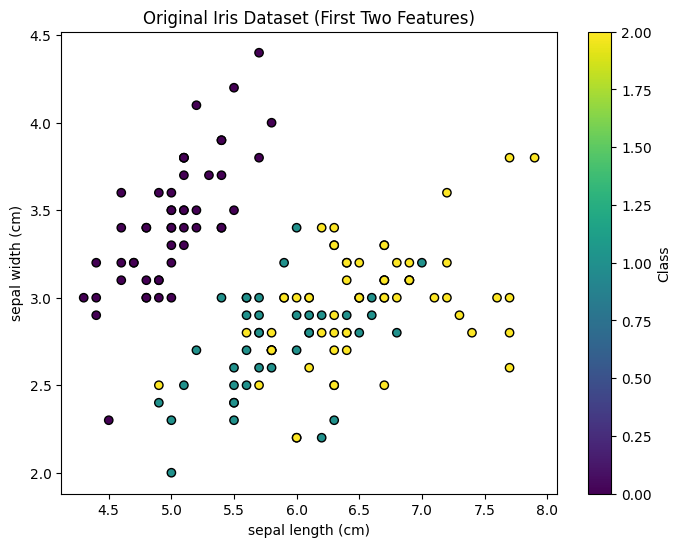

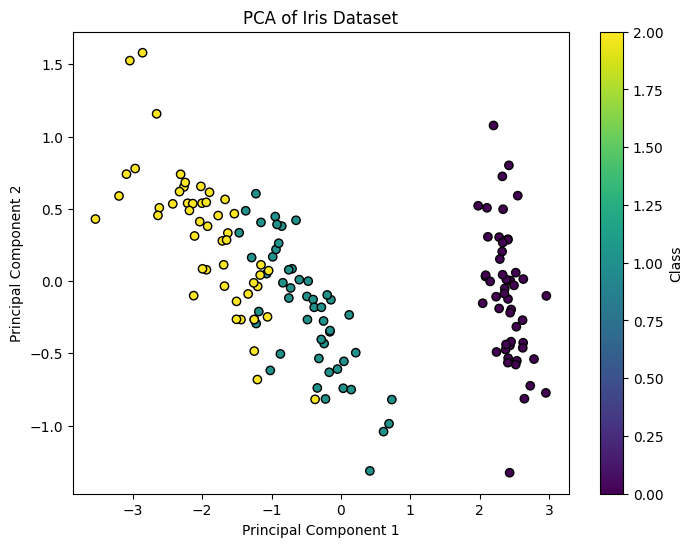

In [1]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        """
        Initialize the PCA model.

        :param n_components: The number of principal components to keep.
        """
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.std = None

    def fit(self, X):
        """
        Fit the PCA model to the dataset X.

        :param X: Data as a 2D numpy array where each row is a sample and each column is a feature.
        """
        # Mean centering
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

        # Avoid division by zero by replacing 0 std with 1 (for constant features)
        self.std[self.std == 0] = 1

        X_centered = (X - self.mean) / self.std

        # Covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort eigenvectors by eigenvalues in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Select the top n_components eigenvectors
        self.components = eigenvectors[:, :self.n_components]


    def transform(self, X):
        """
        Apply the PCA transformation to the dataset X.

        :param X: Data as a 2D numpy array where each row is a sample and each column is a feature.
        :return: Transformed data as a 2D numpy array.
        """
        if self.components is None:
            raise Exception("The model has not been trained yet. Call 'fit' before 'transform'.")

        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def fit_transform(self, X):
        """
        Fit the PCA model to the dataset X and then apply the PCA transformation.

        :param X: Data as a 2D numpy array where each row is a sample and each column is a feature.
        :return: Transformed data as a 2D numpy array.
        """
        self.fit(X)
        return self.transform(X)

# === Usage Example ===

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load a dataset
data = load_iris()
X = data.data
y = data.target

# Plot the original dataset (first two features for visualization)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Original Iris Dataset (First Two Features)')
plt.colorbar(label='Class')
plt.show()

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA-transformed dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Class')
plt.show()
